In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("books_of_the_decade.csv")

In [7]:
df

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509
...,...,...,...,...,...,...
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,4.49,"3,764",4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,3.80,"73,552",4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,3.48,430,3
2327,2328,The Foundling,Ann Leary,3.89,"12,851",3


In [15]:
df.head(8)

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509
5,6,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,4.57,"2,071,618",32490
6,7,The Ballad of Songbirds and Snakes (The Hunger...,Suzanne Collins,3.96,"853,601",24060
7,8,Piranesi,Susanna Clarke,4.23,"323,496",23238


In [17]:
df.shape

(2329, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            2329 non-null   int64 
 1   Book Name        2329 non-null   object
 2   Author           2329 non-null   object
 3   Rating           2329 non-null   object
 4   Number of Votes  2329 non-null   object
 5   Score            2329 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 109.3+ KB


In [23]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            2329 non-null   int64  
 1   Book Name        2329 non-null   object 
 2   Author           2329 non-null   object 
 3   Rating           2305 non-null   float64
 4   Number of Votes  329 non-null    float64
 5   Score            2329 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 109.3+ KB


In [27]:
df.isnull().sum()

Index                 0
Book Name             0
Author                0
Rating               24
Number of Votes    2000
Score                 0
dtype: int64

In [31]:
# Filling null values in 'Rating' with the median rating
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

# Filling null values in 'Number of Votes' with 0
df['Number of Votes'].fillna(0, inplace=True)

In [35]:
df['Book Name'].value_counts()

Book Name
The Silence                                     2
The Glass House                                 2
After We Gazed at the Starry Sky, Vol. 1        1
The Magnolia Palace                             1
Lunar New Year Love Story                       1
                                               ..
Under The Great Elm: A Life of Luck & Wonder    1
Wildfire (Maple Hills, #2)                      1
Someone Else's Shoes                            1
The True Love Experiment                        1
The Mermaid from Jeju                           1
Name: count, Length: 2327, dtype: int64

In [37]:
print(df[df['Book Name']=='The Silence'],'\n')
print(df[df['Book Name']=='The Glass House'])

      Index    Book Name        Author  Rating  Number of Votes  Score
564     565  The Silence  Daisy Pearce    3.81              0.0    197
1311   1312  The Silence   Don DeLillo    2.66              0.0     94 

      Index        Book Name      Author  Rating  Number of Votes  Score
1359   1360  The Glass House  Anne Buist    3.88              0.0     93
1480   1481  The Glass House   Eve Chase    3.98              0.0     89


In [41]:
book_authors=df['Author'].value_counts()
print(book_authors)

Author
Caroline Peckham      14
J. Bree               14
Brandon Sanderson     13
James Patterson       12
Tate James            11
                      ..
Φάνης Παπαγεωργίου     1
Jacob Acerbi           1
Lorenzo James          1
Nina Raman             1
Sumi Hahn              1
Name: count, Length: 1768, dtype: int64


In [43]:
# Authors with more than one books
author_counts = df['Author'].value_counts()

multiple_books_authors = author_counts[author_counts > 1].index
filtered_books = df[df['Author'].isin(multiple_books_authors)]
print(len(multiple_books_authors))

311


In [45]:
author_stats = (
    df.groupby('Author')
    .agg(
        number_of_books=('Book Name', 'count'),   # Count the number of books per author
        total_score=('Score', 'sum')              # Sum the scores of each author's books
    )
    .reset_index()
)

top_authors = author_stats.sort_values(by='total_score', ascending=False)

print('Best seller authors by total score:')
top_authors[['Author', 'number_of_books', 'total_score']].head(10)

Best seller authors by total score:


,Author,number_of_books,total_score
1708,Victoria Schwab,4,63296
1629,T.J. Klune,3,59133
1504,Sarah J. Maas,5,50242
121,Andy Weir,1,45972
526,Emily Henry,6,43270
1145,Matt Haig,2,42815
1404,Rebecca Yarros,3,39828
752,Jennette McCurdy,1,37509
1368,R.F. Kuang,3,27380
1648,Taylor Jenkins Reid,2,26068


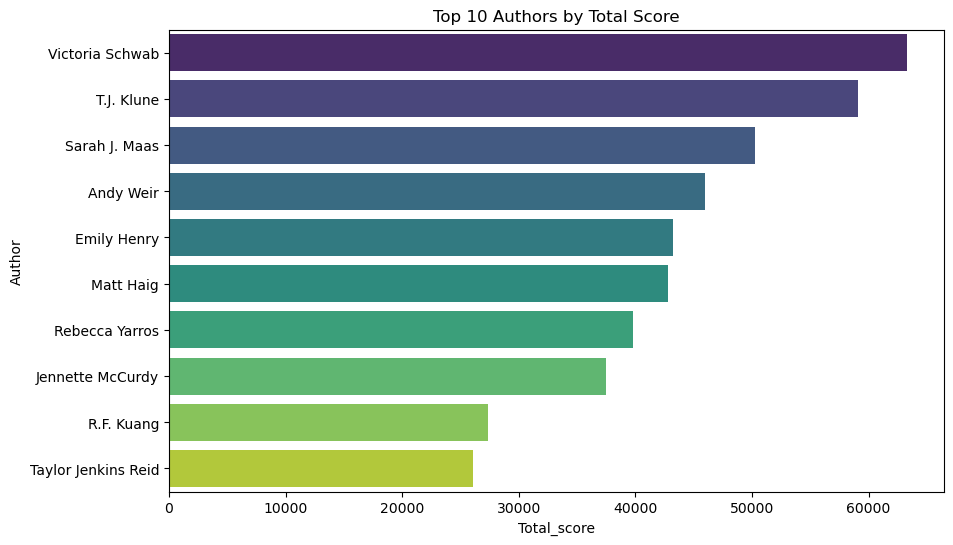

In [47]:
top_auth = top_authors['Author'].head(10)
top_scr= top_authors['total_score'].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scr.values, y=top_auth.values , palette='viridis')
plt.title('Top 10 Authors by Total Score')
plt.xlabel('Total_score')
plt.ylabel('Author')
plt.show()

In [49]:
print("Best seller authors by Number of books in the data:")

top_author_by_books = author_stats.sort_values(by='number_of_books', ascending=False)
top_author_by_books

Best seller authors by Number of books in the data:


,Author,number_of_books,total_score
282,Caroline Peckham,14,984
688,J. Bree,14,849
230,Brandon Sanderson,13,11771
709,James Patterson,12,1509
1644,Tate James,11,1298
...,...,...,...
640,Harold Schechter,1,69
639,Harm Ede Botje,1,97
638,Hannah Templer,1,72
637,Hannah Richell,1,99


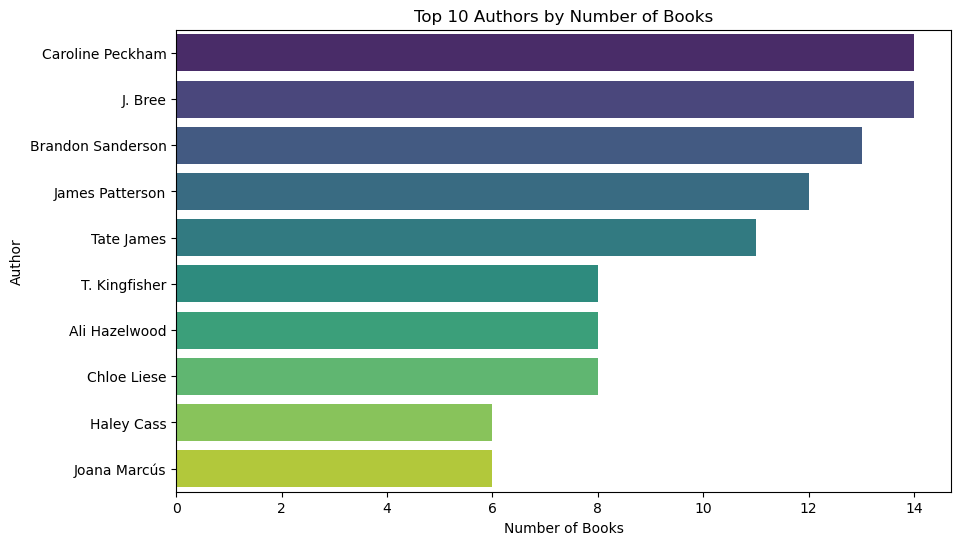

In [53]:
top_author_by_books = df['Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_author_by_books.values, y=top_author_by_books.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

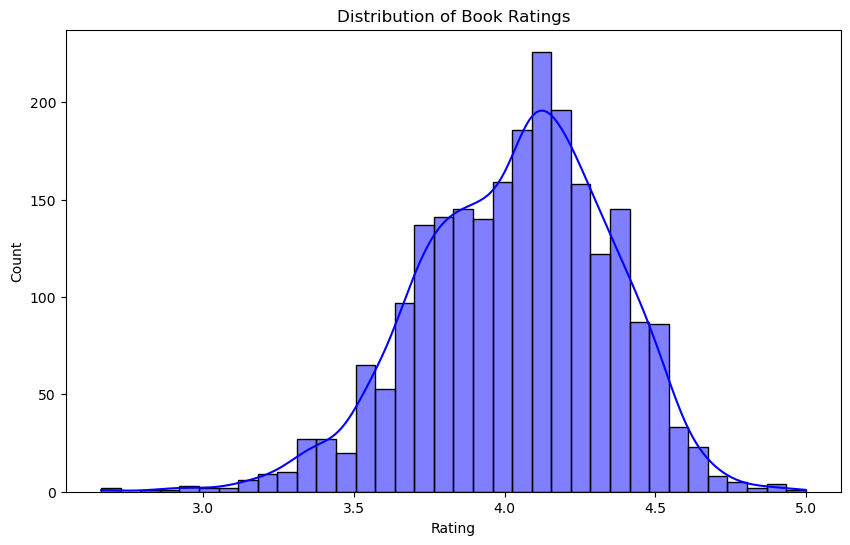

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, color='blue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.show()

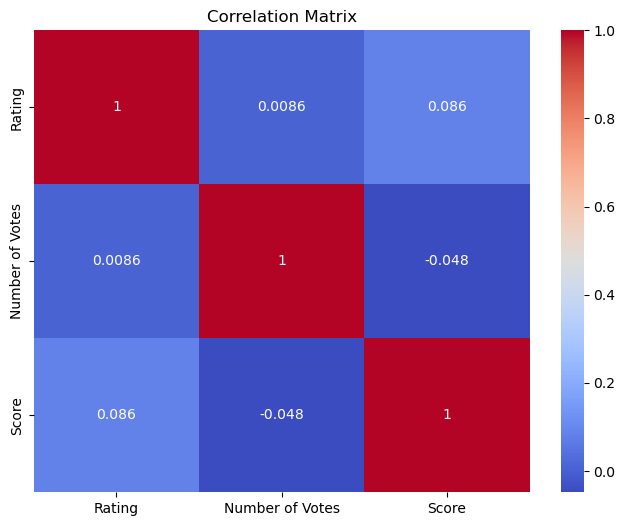

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Rating', 'Number of Votes', 'Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

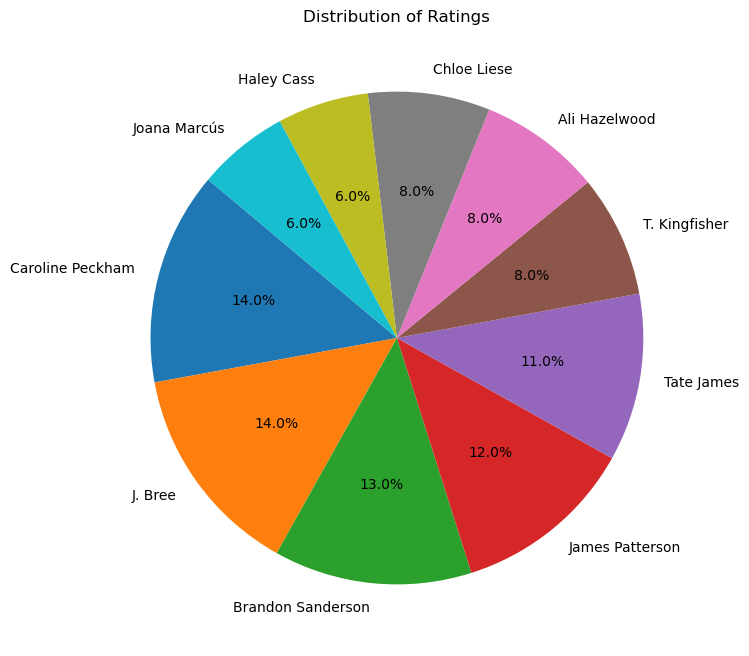

In [59]:
author_counts = df['Author'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()

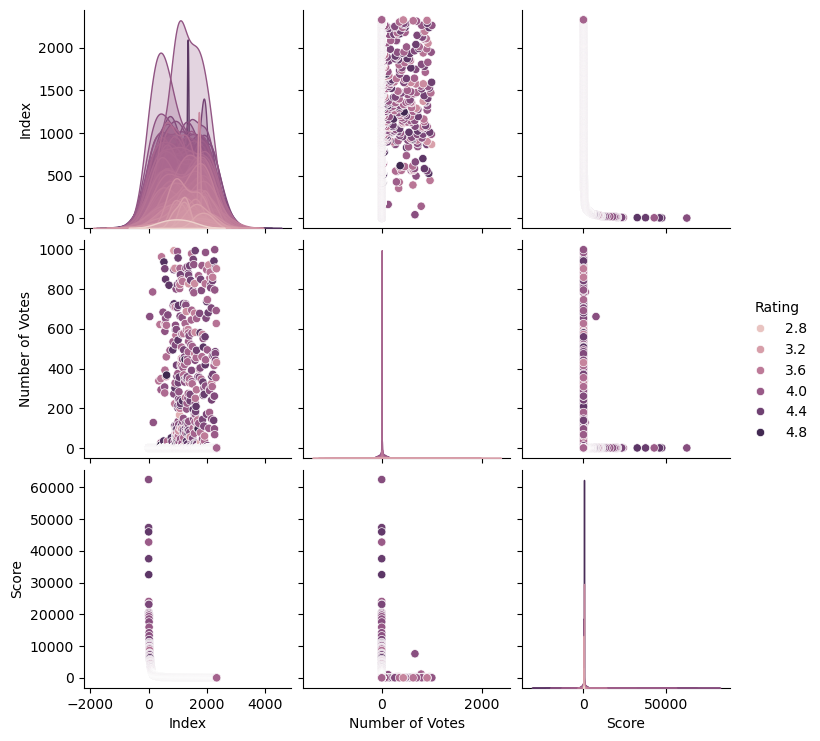

In [61]:
sns.pairplot(df, hue="Rating")

In [1]:
# practical use of simple linear regression
#predicting the house price depending on area

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [17]:
reg.fit(df[["Index"]], df.Score)

LinearRegression()

In [19]:
df.Index.values

array([   1,    2,    3, ..., 2327, 2328, 2329], dtype=int64)

In [21]:
x=df.Index.values.reshape(-1,1)

In [23]:
reg.fit(x, df.Score)

LinearRegression()

In [25]:
df[["Index"]]

,Index
0,1
1,2
2,3
3,4
4,5
...,...
2324,2325
2325,2326
2326,2327
2327,2328


In [31]:
reg.fit(df[["Index"]], df.Score)

LinearRegression()

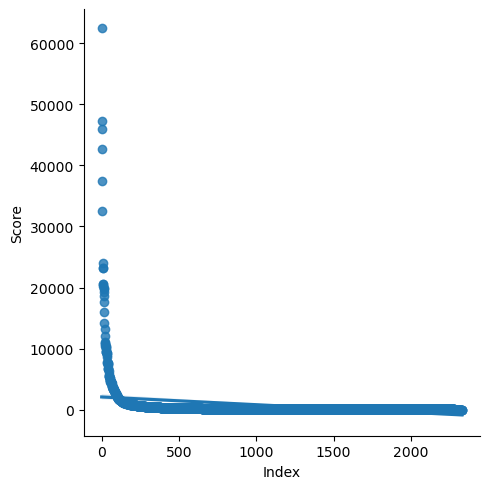

In [33]:
sns.lmplot(data=df, x="Index", y="Score")